In [1]:
import pandas as pd
import numpy as np
import loompy as lp
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import scipy.stats

import os

# import hdbscan
import sklearn

## **Read in saved results files**

Read in files with saved DE-$\theta$ results for CBL-CNN1 and DUSP9-ETS2 conditions

In [2]:
!wget --content-disposition https://github.com/pachterlab/CGP_2024_2/raw/main/results/proximity_genomeFeats_files.tar.gz
!tar -xvf proximity_genomeFeats_files.tar.gz

--2024-07-03 09:51:46--  https://github.com/pachterlab/CGP_2024_2/raw/main/results/proximity_genomeFeats_files.tar.gz
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pachterlab/CGP_2024_2/main/results/proximity_genomeFeats_files.tar.gz [following]
--2024-07-03 09:51:47--  https://raw.githubusercontent.com/pachterlab/CGP_2024_2/main/results/proximity_genomeFeats_files.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3382579 (3.2M) [application/octet-stream]
Saving to: ‘proximity_genomeFeats_files.tar.gz’

proximity_genomeFea 100%[===================>]   3.23M  --.-KB/s    in 0.03s   

2024-

**Genes with likely-repressed (by mult or super-mult strategy) $k$ in CBl/CNN1**

In [3]:
repress_gs = pd.read_csv('0607_norman_repress_genes_mult.csv')
repress_gs.head()

,Gene,Annot,BetaFC,Cond
0,CFH,mult,2.377362,CBL/CNN1
1,IVNS1ABP,mult,1.762381,CBL/CNN1
2,ZMYND11,supermult,-0.390580,CBL/CNN1
3,WDR74,supermult,1.983459,CBL/CNN1
4,PUS1,supermult,0.705497,CBL/CNN1


In [4]:
mult_gs = list(repress_gs['Gene'][repress_gs.Cond.isin(['CBL/CNN1'])])
for i in mult_gs:
    print(i)

CFH
IVNS1ABP
ZMYND11
WDR74
PUS1
RSRC2
CCNB1IP1
ATP2A3
TSEN54
STAT5A
CAVIN1
NME2
RUVBL2
CDC37
PRSS57
GPI
ATF5
HNRNPLL
HK2
SMARCB1
MRPL3
THOC7
ZNF445
USP46
RNF130
NDUFAF2
WASF1
NDUFAF4
FLOT1
LSM5
CHST12
PMS2
ARPC5L
FNBP1


In [5]:
s = ','.join(np.unique(mult_gs))
s

'ARPC5L,ATF5,ATP2A3,CAVIN1,CCNB1IP1,CDC37,CFH,CHST12,FLOT1,FNBP1,GPI,HK2,HNRNPLL,IVNS1ABP,LSM5,MRPL3,NDUFAF2,NDUFAF4,NME2,PMS2,PRSS57,PUS1,RNF130,RSRC2,RUVBL2,SMARCB1,STAT5A,THOC7,TSEN54,USP46,WASF1,WDR74,ZMYND11,ZNF445'

In [6]:
new_repr = repress_gs[repress_gs.Cond.isin(['CBL/CNN1'])]

In [7]:
repr_means = [np.mean(new_repr['BetaFC'][new_repr['Gene'].isin([i])]) for i in np.unique(mult_gs)]

repr_dict = dict(zip(np.unique(mult_gs),repr_means))

Use https://useast.ensembl.org/biomart/martview/1951423d0d221093fcafc3cdca942e65 to put in list of genes

Human genes (GRCh38.p14)

Get out Attributes
- Gene name
- Chromosome/scaffold name
- Gene start (bp)
- Gene end (bp)

In [8]:
#Save in correct format

#chr, start, end, value
repr_annots = pd.read_csv('repress_gs_chr_start_end.txt')
repr_annots.head()

,Gene name,Chromosome/scaffold name,Gene start (bp),Gene end (bp)
0,CCNB1IP1,HG2526_HG2573_PATCH,514049,535993
1,ATP2A3,17,3923870,3964464
2,ARPC5L,9,124862130,124877733
3,CDC37,19,10391133,10420121
4,NDUFAF4,6,96889315,96897891


In [9]:
np.unique(repr_annots['Chromosome/scaffold name'])

array(['1', '10', '11', '12', '14', '17', '19', '2', '22', '3', '4', '5',
       '6', '7', '9', 'HG2526_HG2573_PATCH', 'HSCHR19_2_CTG3_1',
       'HSCHR22_1_CTG7', 'HSCHR6_MHC_APD_CTG1', 'HSCHR6_MHC_COX_CTG1',
       'HSCHR6_MHC_DBB_CTG1', 'HSCHR6_MHC_MANN_CTG1',
       'HSCHR6_MHC_MCF_CTG1', 'HSCHR6_MHC_QBL_CTG1',
       'HSCHR6_MHC_SSTO_CTG1'], dtype=object)

In [10]:
repr_annots = repr_annots[~repr_annots['Chromosome/scaffold name'].isin(['HG2526_HG2573_PATCH', 'HSCHR19_2_CTG3_1',
       'HSCHR22_1_CTG7', 'HSCHR6_MHC_APD_CTG1', 'HSCHR6_MHC_COX_CTG1',
       'HSCHR6_MHC_DBB_CTG1', 'HSCHR6_MHC_MANN_CTG1',
       'HSCHR6_MHC_MCF_CTG1', 'HSCHR6_MHC_QBL_CTG1',
       'HSCHR6_MHC_SSTO_CTG1'])]
repr_annots.head()

,Gene name,Chromosome/scaffold name,Gene start (bp),Gene end (bp)
1,ATP2A3,17,3923870,3964464
2,ARPC5L,9,124862130,124877733
3,CDC37,19,10391133,10420121
4,NDUFAF4,6,96889315,96897891
5,LSM5,7,32485338,32495283


In [11]:
repr_bar = pd.DataFrame()
repr_bar['chr'] = ['chr'+i for i in list(repr_annots['Chromosome/scaffold name'])]
repr_bar['start'] = list(repr_annots['Gene start (bp)'])
repr_bar['end'] = list(repr_annots['Gene end (bp)'])
repr_bar['value'] = [repr_dict[i] for i in list(repr_annots['Gene name'])]
repr_bar['color'] = [list(new_repr.Annot[new_repr.Gene.isin([i])])[0] for i in list(repr_annots['Gene name'])]
repr_bar.head()

,chr,start,end,value,color
0,chr17,3923870,3964464,0.841446,mult
1,chr9,124862130,124877733,1.625649,supermult
2,chr19,10391133,10420121,0.308934,supermult
3,chr6,96889315,96897891,1.275879,supermult
4,chr7,32485338,32495283,0.480737,supermult


In [12]:
#Save gene labels in correct format

#chr, start, end, label
repr_labs = pd.DataFrame()
repr_labs['chr'] = ['chr'+i for i in list(repr_annots['Chromosome/scaffold name'])]
repr_labs['start'] = list(repr_annots['Gene start (bp)'])
repr_labs['end'] = list(repr_annots['Gene end (bp)'])
repr_labs['label'] = list(repr_annots['Gene name'])
repr_labs.head()

,chr,start,end,label
0,chr17,3923870,3964464,ATP2A3
1,chr9,124862130,124877733,ARPC5L
2,chr19,10391133,10420121,CDC37
3,chr6,96889315,96897891,NDUFAF4
4,chr7,32485338,32495283,LSM5


In [124]:
repr_bar.to_csv('repress_barplot.csv',index=None)
repr_labs.to_csv('repress_gene_labels.csv',index=None)

3964464

**All genes with higher burst sizes in CBL/CNN1**

In [13]:
allguides = pd.read_csv('bFC_allguides_cblcnn1_dusp9ets2_norman.csv')
allguides.head()

,FC,Param,sgRNA,meanS,errs,Gene
0,0.032707,b,"['CBL', 'CNN1']",0.207317,0.268927,AL592183.1
1,0.021378,b,"['CBL', 'CNN1']",0.146341,0.186889,VPS13D
2,-0.143794,b,"['CBL', 'CNN1']",0.195122,0.264211,TARBP1
3,0.063379,b,"['CBL', 'CNN1']",1.715447,0.139588,HSPB11
4,0.693564,b,"['CBL', 'CNN1']",0.219512,0.309607,KLHL20


In [14]:
np.mean(allguides['FC'][allguides['Gene'].isin(['CBL','CNN1']) & allguides['sgRNA'].isin(["['CBL', 'CNN1']"]) & allguides['Param'].isin(['b'])])


2.980778963981756

In [15]:
np.mean(allguides['FC'][allguides['Gene'].isin(['DUSP9','ETS2']) & allguides['sgRNA'].isin(["['DUSP9', 'ETS2']"]) & allguides['Param'].isin(['b'])])


0.6943951374457078

In [16]:
allguides[allguides['Gene'].isin(['DUSP9','ETS2']) & allguides['sgRNA'].isin(["['DUSP9', 'ETS2']"])]

,FC,Param,sgRNA,meanS,errs,Gene
27988,0.595973,b,"['DUSP9', 'ETS2']",0.178233,0.222511,ETS2
30899,1.102949,b,"['DUSP9', 'ETS2']",0.178233,0.222511,ETS2
33810,0.384264,b,"['DUSP9', 'ETS2']",0.178233,0.222511,ETS2
36721,-2.046486,beta,"['DUSP9', 'ETS2']",0.178233,0.218436,ETS2
39632,-1.613499,beta,"['DUSP9', 'ETS2']",0.178233,0.218436,ETS2
42543,-2.205772,beta,"['DUSP9', 'ETS2']",0.178233,0.218436,ETS2
45454,-1.653086,gamma,"['DUSP9', 'ETS2']",0.178233,0.224914,ETS2
48365,-1.679085,gamma,"['DUSP9', 'ETS2']",0.178233,0.224914,ETS2
51276,-2.007366,gamma,"['DUSP9', 'ETS2']",0.178233,0.224914,ETS2


In [17]:
guides_filt = (allguides['FC']>2) & (allguides['sgRNA'].isin(["['CBL', 'CNN1']"])) & (allguides['Param'].isin(['b'])) & (allguides['meanS']>0)
cblcnn1_gs = list(allguides['Gene'][guides_filt])
#cblcnn1_gs


In [18]:
new_allguides = allguides[guides_filt]

In [19]:
cbcn = [i for i in cblcnn1_gs if i not in mult_gs]
cbcn_str = ','.join(np.unique(cbcn))
cbcn_str

'AAMDC,AC016629.2,AC138649.1,ALAS2,AP000547.3,AZIN1,B3GNT2,BCL2L11,BPGM,BRD8,CBL,CCND2,CD99,CDC25B,CDC5L,CDK11B,CDS2,CEBPB,CEBPE,CHCHD2,CHD8,CHI3L2,CNN1,COL1A1,CSRNP1,DDX49,DHX8,DLST,DLX2,DNTTIP1,DPY30,EEF1A1,EEF2,EGR1,EIF2AK2,FAM92A,FEZ2,FOXA1,FOXO4,GATB,GNAI3,GORASP2,GTF2H3,HAGH,HAUS5,HBD,HMGXB4,IDH1,IER5L,IL27RA,INPP5B,KCTD3,KIAA1143,KRAS,LIG1,LPCAT2,LPIN1,LRRC4B,LTN1,LYL1,METTL9,MKNK1,MTPAP,NANOG,NTRK1,NUP188,OAT,PARL,PCMTD1,POLR3G,PPWD1,PRPF4,PSPH,PTER,QTRT1,RAB11FIP1,RAB20,RBM19,RIPK2,ROCK1,RPE,RPL37A,RPS6,RPS6KA1,RUFY1,SEM1,SENP2,SERINC1,SIRT1,SLC39A1,SLC4A1,SNHG5,SOCS2-AS1,STAC3,TBC1D13,TCAF1,TFB2M,TGFBR3,TMEM189,TMEM35B,TMEM9,TMOD1,TPGS2,TRAF3IP1,TRPM4,UHRF1BP1L,UPF1,VPS13A,VPS13B-DT,VPS35,WDR75,WRNIP1,Z98745.2,ZNF318'

In [20]:
for i in cbcn:
    print(i)

MKNK1
NTRK1
TFB2M
TMEM9
CHI3L2
SIRT1
MTPAP
PTER
OAT
HBD
AAMDC
CCND2
RBM19
SOCS2-AS1
RAB20
DLST
AC138649.1
LPCAT2
DHX8
ROCK1
DDX49
CNN1
IL27RA
AC016629.2
LPIN1
DPY30
B3GNT2
FEZ2
RPL37A
CDS2
LTN1
HMGXB4
PARL
GATB
BRD8
RUFY1
PSPH
RAB11FIP1
FAM92A
TBC1D13
RPS6
NUP188
CD99
CEBPB
COL1A1
FOXA1
IER5L
NANOG
SLC4A1
ZNF318
SLC39A1
NTRK1
TMEM9
GNAI3
INPP5B
TMEM35B
OAT
HBD
UHRF1BP1L
SOCS2-AS1
RAB20
DLST
CHD8
LPCAT2
DHX8
ROCK1
HAUS5
CNN1
UPF1
LRRC4B
AC016629.2
EIF2AK2
DPY30
B3GNT2
WDR75
RPL37A
CDC25B
DNTTIP1
LTN1
SENP2
PPWD1
RUFY1
EEF1A1
SNHG5
SEM1
RAB11FIP1
FAM92A
VPS13B-DT
TBC1D13
TMOD1
RPS6
NUP188
CD99
BCL2L11
CEBPB
CEBPE
COL1A1
CSRNP1
FOXA1
IER5L
LYL1
SLC4A1
TGFBR3
KCTD3
CDK11B
TFB2M
RPS6KA1
GNAI3
OAT
HBD
GTF2H3
KRAS
STAC3
SOCS2-AS1
DLST
LPCAT2
VPS35
METTL9
HAGH
DHX8
TPGS2
ROCK1
QTRT1
CNN1
TRPM4
LIG1
EEF2
AC016629.2
GORASP2
LPIN1
DPY30
B3GNT2
IDH1
RPE
RPL37A
TRAF3IP1
TMEM189
CDS2
LTN1
AP000547.3
KIAA1143
GATB
PPWD1
POLR3G
SERINC1
SNHG5
CDC5L
WRNIP1
Z98745.2
TCAF1
CHCHD2
RIPK2
AZIN1
PCMTD1
RPS6
V

In [ ]:
#ALAS2 and K562 diff -> https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4691035/
#Other TFs
#FOXA1, EGR1


In [21]:
bfc_means = [np.mean(new_allguides['FC'][new_allguides['Gene'].isin([i])]) for i in cbcn]

cbcn_dict = dict(zip(cbcn,bfc_means))

Use https://useast.ensembl.org/biomart/martview/1951423d0d221093fcafc3cdca942e65 with gene list

Human genes (GRCh38.p14)

Get out Attributes
- Gene name
- Chromosome/scaffold name
- Gene start (bp)
- Gene end (bp)

In [22]:
#Save in correct format

#chr, start, end, value
bFC_annots = pd.read_csv('bFC_cblcnn1_chr_start_end.txt')
bFC_annots.head()

,Gene name,Chromosome/scaffold name,Gene start (bp),Gene end (bp)
0,CD99,Y,2691187,2741309
1,RPS6KA1,HG2058_PATCH,17379,62648
2,KIAA1143,HG2066_PATCH,263011,286969
3,TPGS2,18,36777647,36829216
4,RAB20,13,110523066,110561722


In [23]:
np.unique(bFC_annots['Chromosome/scaffold name'])

array(['1', '10', '11', '12', '13', '14', '16', '17', '18', '19', '2',
       '20', '21', '22', '3', '4', '5', '6', '7', '8', '9', 'HG109_PATCH',
       'HG2058_PATCH', 'HG2066_PATCH', 'HG2219_PATCH', 'HG30_PATCH',
       'HG926_PATCH', 'X', 'Y'], dtype=object)

In [24]:
bFC_annots = bFC_annots[~bFC_annots['Chromosome/scaffold name'].isin(['HG109_PATCH',
       'HG2058_PATCH', 'HG2066_PATCH', 'HG2219_PATCH', 'HG30_PATCH',
       'HG926_PATCH'])]
bFC_annots.head()

,Gene name,Chromosome/scaffold name,Gene start (bp),Gene end (bp)
0,CD99,Y,2691187,2741309
3,TPGS2,18,36777647,36829216
4,RAB20,13,110523066,110561722
6,PCMTD1,8,51817575,51899186
7,TMOD1,9,97501180,97601743


In [25]:
cbcn_bar = pd.DataFrame()
cbcn_bar['chr'] = ['chr'+i for i in list(bFC_annots['Chromosome/scaffold name'])]
cbcn_bar['start'] = list(bFC_annots['Gene start (bp)'])
cbcn_bar['end'] = list(bFC_annots['Gene end (bp)'])
cbcn_bar['value'] = [cbcn_dict[i] for i in list(bFC_annots['Gene name'])]
cbcn_bar.head()

,chr,start,end,value
0,chrY,2691187,2741309,2.688198
1,chr18,36777647,36829216,2.828992
2,chr13,110523066,110561722,2.066996
3,chr8,51817575,51899186,2.037837
4,chr9,97501180,97601743,2.321950


In [26]:
#Save gene labels in correct format

#chr, start, end, label
cbcn_labs = pd.DataFrame()
cbcn_labs['chr'] = ['chr'+i for i in list(bFC_annots['Chromosome/scaffold name'])]
cbcn_labs['start'] = list(bFC_annots['Gene start (bp)'])
cbcn_labs['end'] = list(bFC_annots['Gene end (bp)'])
cbcn_labs['label'] = list(bFC_annots['Gene name'])
cbcn_labs.head()

,chr,start,end,label
0,chrY,2691187,2741309,CD99
1,chr18,36777647,36829216,TPGS2
2,chr13,110523066,110561722,RAB20
3,chr8,51817575,51899186,PCMTD1
4,chr9,97501180,97601743,TMOD1


In [116]:
cbcn_bar.to_csv('bFC_barplot.csv',index=None)
cbcn_labs.to_csv('bFC_gene_labels.csv',index=None)

**Use Grch38 chr file for circos**

In [47]:
!wget --content-disposition https://raw.githubusercontent.com/sehilyi/gemini-datasets/master/data/UCSC.HG38.Human.CytoBandIdeogram.csv

--2024-06-10 13:11:55--  https://raw.githubusercontent.com/sehilyi/gemini-datasets/master/data/UCSC.HG38.Human.CytoBandIdeogram.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30789 (30K) [text/plain]
Saving to: ‘UCSC.HG38.Human.CytoBandIdeogram.csv’

UCSC.HG38.Human.Cyt 100%[===================>]  30.07K  --.-KB/s    in 0s      

2024-06-10 13:11:55 (128 MB/s) - ‘UCSC.HG38.Human.CytoBandIdeogram.csv’ saved [30789/30789]



In [27]:
hg38 = pd.read_csv('UCSC.HG38.Human.CytoBandIdeogram.csv')
hg38.head()

,Chromosome,chromStart,chromEnd,Name,Stain
0,chr1,0,2300000,p36.33,gneg
1,chr1,2300000,5300000,p36.32,gpos25
2,chr1,5300000,7100000,p36.31,gneg
3,chr1,7100000,9100000,p36.23,gpos25
4,chr1,9100000,12500000,p36.22,gneg


In [28]:
np.unique(hg38.Chromosome)

array(['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr20', 'chr21',
       'chr22', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9',
       'chrX', 'chrY'], dtype=object)

In [103]:
#save in correct format
new_hg38 = pd.DataFrame()
new_hg38['chr'] = list(hg38.Chromosome)
new_hg38['start'] = [i+1 for i in list(hg38.chromStart)]
new_hg38['end'] = [i+1 for i in list(hg38.chromEnd)]
new_hg38['value1'] = list(hg38.Name)
new_hg38['value2'] = list(hg38.Stain)

new_hg38.to_csv('norman_chromosome_general.csv',index=None)
new_hg38.head()



,chr,start,end,value1,value2
0,chr1,1,2300001,p36.33,gneg
1,chr1,2300001,5300001,p36.32,gpos25
2,chr1,5300001,7100001,p36.31,gneg
3,chr1,7100001,9100001,p36.23,gpos25
4,chr1,9100001,12500001,p36.22,gneg


**All files for repressed genes, burst size genes, and the hg38 chromosome/cytoband are used in the circos plot**

For circos figures cite: https://venyao.xyz/shinycircos/

Wang et al. iMeta. 2023 https://onlinelibrary.wiley.com/doi/full/10.1002/imt2.109

In [ ]:
#Potential findings
#ALAS2 --> erythroid diff, near FOXO4 (TF) upreg, does it have Foxo4 binding sites?
#Several other TFs


#repression
#

In [137]:
#Read in chromosome csvs with genes names in order

#From https://genome.ucsc.edu/cgi-bin/hgGateway

chr1 = pd.read_csv('hg38_chr1.tsv',delimiter='\t',skiprows=[0], header=None)
chr2 = pd.read_csv('hg38_chr2.tsv',delimiter='\t',skiprows=[0], header=None)
chr9 = pd.read_csv('hg38_chr9.tsv',delimiter='\t',skiprows=[0], header=None)
chr12 = pd.read_csv('hg38_chr12.tsv',delimiter='\t',skiprows=[0], header=None)
chr19 = pd.read_csv('hg38_chr19.tsv',delimiter='\t',skiprows=[0], header=None)
chr19.head()

,0,1,2,3,4,5,6,7,8,9,10
0,chr19,60950,71566,WASH5P,273,-,ENSG00000282458.1,transcribed_processed_pseudogene,54,"1.084,0.782,0.822,0.942,0.838,0.856,0.972,0.20...",NaN
1,chr19,68402,69166,AC008993.2,17,+,ENSG00000282542.1,TEC,54,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.08...",NaN
2,chr19,69178,69972,LLNLR-222A1.1,0,+,ENSG00000282798.1,TEC,54,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",NaN
3,chr19,71777,72718,AC008993.3,0,+,ENSG00000282807.3,lincRNA,54,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",NaN
4,chr19,76162,77686,FAM138F,0,-,ENSG00000282591.1,lincRNA,54,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",NaN


In [145]:
chr1_bin = np.array([i in cbcn for i in chr1[3]])*1
chr2_bin = np.array([i in cbcn for i in chr2[3]])*1
chr9_bin = np.array([i in cbcn for i in chr9[3]])*1
chr12_bin = np.array([i in cbcn for i in chr12[3]])*1
chr19_bin = np.array([i in cbcn for i in chr19[3]])*1

27

In [156]:
#Convert each in binary (1 = gene in list, 0 not in list)
import itertools
import scipy.stats as st

def getRuns(l):
    '''
    Get number of runs in string l
    '''
    return len([sum(1 for _ in r) for _, r in itertools.groupby(l)])


def calcRunsTest(numInGrp,numOutGrp,numRuns):
    tot = numInGrp+numOutGrp
    mu = (2*numInGrp*numOutGrp)/(tot) + 1
    sigma = np.sqrt((mu-1)*(mu-2)/(tot-1))
    z = (numRuns - mu)/(sigma) #+c 0.5 is small samples

    return st.norm.sf(abs(z))



In [157]:
for d in [chr1_bin,chr2_bin,chr9_bin,chr12_bin,chr19_bin]:
    print(calcRunsTest(np.sum(d),len(d)-np.sum(d),getRuns(d)))

0.42586197363428313
0.415518454162152
0.4379044732375017
0.4381401189477861
0.4146108646800421


### **Compare speckle proximity/contact scores for selected genes**

In [29]:
exp_1mb = pd.read_csv('GM12878.speckle.1Mb.bedgraph.txt',delimiter='\t',header=None)
exp_1mb.head()

,0,1,2,3
0,chr10,0,1000000,41.026565
1,chr10,100000000,101000000,43.006025
2,chr10,10000000,11000000,34.120481
3,chr10,1000000,2000000,40.378992
4,chr10,101000000,102000000,37.910324


In [30]:
filt = ['chr'+str(i) for i in range(1,23)]

scores_1mb = []
ges = []
fs = []

st_end_1mb = []

g_fcs = []

for f in filt:
    if f != 'chr15':
        sub_1mb = exp_1mb[exp_1mb[0].isin([f])]
    
        sub_gs = cbcn_labs[cbcn_labs.chr.isin([f])]

        sub_fcs = cbcn_bar[cbcn_bar.chr.isin([f])]
    
        for g in list(sub_gs.label):
            print(g)
            strt = list(sub_gs.start[sub_gs.label.isin([g])])[0]
            print(strt)
            if len(np.array(sub_1mb[1]< strt)) > 0 :
                s = list(sub_1mb[3][np.array(sub_1mb[1]<strt) & np.array(sub_1mb[2]>strt)])[0]
                scores_1mb += [s]

        
                ges += [g]
        
                fs += [f]

                g_fcs += [list(sub_fcs.value[sub_gs.label.isin([g])])[0]]

                st_end_1mb += [(sub_1mb[1][np.array(sub_1mb[1]<strt) & np.array(sub_1mb[2]>strt)],sub_1mb[2][np.array(sub_1mb[1]<strt) & np.array(sub_1mb[2]>strt)] )]
       
speck_scores = pd.DataFrame()
speck_scores['Gene'] = ges
speck_scores['Chr'] = fs
speck_scores['1mb_score'] = scores_1mb
speck_scores['FC'] = g_fcs
speck_scores['st_end_1mb'] = st_end_1mb
speck_scores.head()

TGFBR3
91680343
TFB2M
246540561
KCTD3
215567304
MKNK1
46557407
CHI3L2
111200771
SLC39A1
153959099
CDK11B
1635225
TMEM9
201134772
TMEM35B
34981380
RPS6KA1
26529761
NTRK1
156815636
INPP5B
37860697
GNAI3
109548615
FEZ2
36531805
B3GNT2
62196115
WDR75
189441446
TRAF3IP1
238320441
DPY30
31867809
LPIN1
11677595
IDH1
208236229
EIF2AK2
37099210
RPL37A
216498825
GORASP2
170928464
RPE
210002565
BCL2L11
111119378
DLX2
172099438
SENP2
185582496
PARL
183829271
CSRNP1
39141855
KIAA1143
44737661
GATB
151670504
PPWD1
65563236
POLR3G
90471748
BRD8
138139770
RUFY1
179550554
EGR1
138465479
ZNF318
43307134
WRNIP1
2765393
EEF1A1
73489308
SNHG5
85650491
SERINC1
122443351
CDC5L
44387706
PSPH
56011051
TCAF1
143851375
CHCHD2
56101573
BPGM
134646811
SEM1
96481626
PCMTD1
51817575
RIPK2
89757806
RAB11FIP1
37858618
AZIN1
102826111
VPS13B-DT
98957568
TMOD1
97501180
VPS13A
77177445
IER5L
129175552
TBC1D13
128787253
NUP188
128947699
PRPF4
113275642
RPS6
19375715
OAT
124397303
MTPAP
30309801
SIRT1
67884656
PTER
1643694

,Gene,Chr,1mb_score,FC,st_end_1mb
0,TGFBR3,chr1,28.983135,2.138725,"([91000000], [92000000])"
1,TFB2M,chr1,37.530812,2.093210,"([246000000], [247000000])"
2,KCTD3,chr1,27.200873,2.038262,"([215000000], [216000000])"
3,MKNK1,chr1,33.492293,2.662165,"([46000000], [47000000])"
4,CHI3L2,chr1,41.415066,2.007853,"([111000000], [112000000])"


In [31]:
cutoff_1mb = np.quantile(a=exp_1mb[3][exp_1mb[0].isin(['chr'+str(i) for i in range(1,23)])], q=0.95)
print(cutoff_1mb)

50.34041110599998


In [32]:
cutoff_1mb_09 = np.quantile(a=exp_1mb[3][exp_1mb[0].isin(['chr'+str(i) for i in range(1,23)])], q=0.9)
print(cutoff_1mb_09)

45.395546831000004


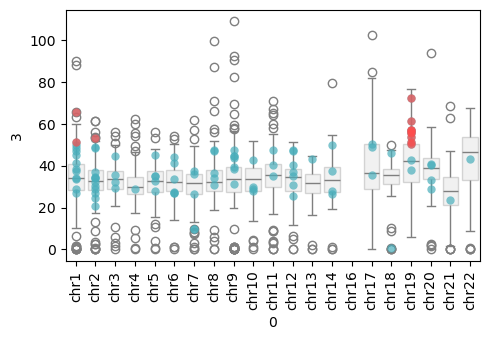

In [33]:
#1mb experiment scores
plt.figure(figsize=(5,3.5))
sns.boxplot(x=exp_1mb[0][~exp_1mb[0].isin(['chrX','chrY'])],y=exp_1mb[3][~exp_1mb[0].isin(['chrX','chrY'])],
            boxprops=dict(alpha=.3),order=['chr'+str(i) for i in range(1,15)]+['chr'+str(i) for i in range(16,23)],
           color='lightgrey')
sns.stripplot(data=speck_scores,x='Chr',y='1mb_score',color='#49AEBB',s=6,
                order=['chr'+str(i) for i in range(1,15)]+['chr'+str(i) for i in range(16,23)],
             alpha=0.7,jitter=False)

sns.stripplot(data=speck_scores[speck_scores['1mb_score']>= cutoff_1mb],x='Chr',y='1mb_score',color='#ff4c4c',s=6,
             order=['chr'+str(i) for i in range(1,15)]+['chr'+str(i) for i in range(16,23)],alpha=0.7,
             jitter=False)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('speckleclose_burstgenes_norman.pdf')

In [34]:
speck_scores

,Gene,Chr,1mb_score,FC,st_end_1mb
0,TGFBR3,chr1,28.983135,2.138725,"([91000000], [92000000])"
1,TFB2M,chr1,37.530812,2.093210,"([246000000], [247000000])"
2,KCTD3,chr1,27.200873,2.038262,"([215000000], [216000000])"
3,MKNK1,chr1,33.492293,2.662165,"([46000000], [47000000])"
4,CHI3L2,chr1,41.415066,2.007853,"([111000000], [112000000])"
...,...,...,...,...,...
95,DNTTIP1,chr20,40.246185,3.032217,"([45000000], [46000000])"
96,CDC25B,chr20,33.326102,2.044222,"([3000000], [4000000])"
97,CEBPB,chr20,40.866507,5.621013,"([50000000], [51000000])"
98,LTN1,chr21,23.580937,2.439476,"([28000000], [29000000])"


In [35]:
speck_scores['start_1mb'] = [list(i[0])[0] for i in speck_scores['st_end_1mb']]
speck_scores.head()

,Gene,Chr,1mb_score,FC,st_end_1mb,start_1mb
0,TGFBR3,chr1,28.983135,2.138725,"([91000000], [92000000])",91000000
1,TFB2M,chr1,37.530812,2.093210,"([246000000], [247000000])",246000000
2,KCTD3,chr1,27.200873,2.038262,"([215000000], [216000000])",215000000
3,MKNK1,chr1,33.492293,2.662165,"([46000000], [47000000])",46000000
4,CHI3L2,chr1,41.415066,2.007853,"([111000000], [112000000])",111000000


In [36]:
sub_speck = speck_scores[speck_scores.Chr.isin(['chr19'])]

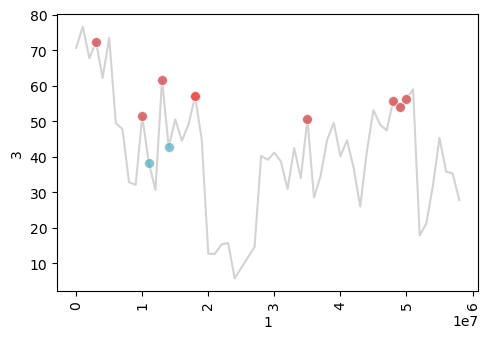

In [37]:
plt.figure(figsize=(5,3.5))
sns.lineplot(x=exp_1mb[1][exp_1mb[0].isin(['chr19'])],y=exp_1mb[3][exp_1mb[0].isin(['chr19'])],
           color='lightgrey',markers=True,errorbar=None,zorder=0)

sns.scatterplot(data=sub_speck,x='start_1mb',y='1mb_score',color='#49AEBB',s=50,
             alpha=0.7,zorder=1)

sns.scatterplot(data=sub_speck[sub_speck['1mb_score']>= cutoff_1mb],x='start_1mb',y='1mb_score',color='#ff4c4c',s=50,
             alpha=0.7,zorder=2)

# sns.stripplot(data=speck_scores[speck_scores['1mb_score']>= cutoff_1mb],x='Chr',y='1mb_score',color='#ff4c4c',s=6,
#              order=['chr'+str(i) for i in range(1,15)]+['chr'+str(i) for i in range(16,23)],
#              jitter=False)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('chr19_speckleclose_burstgenes_norman.pdf')

In [332]:
# sns.stripplot(x=exp_100kb[0][~exp_100kb[0].isin(['chrX','chrY'])],y=exp_100kb[3][~exp_100kb[0].isin(['chrX','chrY'])],
#                 order=['chr'+str(i) for i in range(1,15)]+['chr'+str(i) for i in range(16,23)],color='lightgrey',
#             alpha=.3)

# sns.stripplot(data=speck_scores,x='Chr',y='100kb_score',color='#49AEBB',s=7,
#              order=['chr'+str(i) for i in range(1,15)]+['chr'+str(i) for i in range(16,23)],jitter=False)
# sns.stripplot(data=speck_scores[speck_scores['100kb_score']>= cutoff_100kb],x='Chr',y='100kb_score',color='#ff4c4c',s=7,
#              order=['chr'+str(i) for i in range(1,15)]+['chr'+str(i) for i in range(16,23)],jitter=False)

# plt.xticks(rotation=90)

In [331]:
# sns.boxplot(x=exp_100kb[0][~exp_100kb[0].isin(['chrX','chrY'])],y=exp_100kb[3][~exp_100kb[0].isin(['chrX','chrY'])],
#                 order=['chr'+str(i) for i in range(1,15)]+['chr'+str(i) for i in range(16,23)],color='lightgrey',
#             boxprops=dict(alpha=.3),flierprops={"marker": "x"})

# # sns.stripplot(data=speck_scores,x='Chr',y='100kb_score',color='#49AEBB',s=7,
# #              order=['chr'+str(i) for i in range(1,15)]+['chr'+str(i) for i in range(16,23)],jitter=False)
# # sns.stripplot(data=speck_scores[speck_scores['100kb_score']>= cutoff_100kb],x='Chr',y='100kb_score',color='#ff4c4c',s=7,
# #              order=['chr'+str(i) for i in range(1,15)]+['chr'+str(i) for i in range(16,23)],jitter=False)

# plt.xticks(rotation=90)

In [38]:
speck_scores[speck_scores['1mb_score']>= cutoff_1mb]

,Gene,Chr,1mb_score,FC,st_end_1mb,start_1mb
6,CDK11B,chr1,65.773584,2.316893,"([1000000], [2000000])",1000000
7,TMEM9,chr1,51.279321,3.646472,"([201000000], [202000000])",201000000
21,RPL37A,chr2,53.530621,5.957158,"([216000000], [217000000])",216000000
83,LRRC4B,chr19,56.211636,2.379059,"([50000000], [51000000])",50000000
84,LYL1,chr19,61.655230,2.549392,"([13000000], [14000000])",13000000
87,DDX49,chr19,57.012357,2.134757,"([18000000], [19000000])",18000000
88,QTRT1,chr19,51.363296,2.560416,"([10000000], [11000000])",10000000
89,EEF2,chr19,72.367226,2.905227,"([3000000], [4000000])",3000000
90,HAUS5,chr19,50.544898,2.002322,"([35000000], [36000000])",35000000
91,LIG1,chr19,55.761765,2.291477,"([48000000], [49000000])",48000000


### **HOMER Analysis**

See how to install HOMER here http://homer.ucsd.edu/homer/introduction/install.html (download configureHomer.pl)

In [ ]:
!perl configureHomer.pl -install homer
!export PATH=$PATH:/Users/tarachari/Desktop/Pachter_Lab/homer/.//bin/ #Adapt to wherever HOMER was downloaded

#run findMotifs on repressed genes
!findMotifs.pl ./homer_repr_genes.txt human motifResults/

#run findMotifs on increased burst genes
!findMotifs.pl ./homer_burst_genes.txt human motifResults_burst/
